graph [[ 0.  0. 39.  0. 16.]
 [ 0.  0. 49. 52.  0.]
 [39. 49.  0. 59. 50.]
 [ 0. 52. 59.  0. 35.]
 [16.  0. 50. 35.  0.]]
trafic [[ 0.  0.  0.  0. 11.]
 [ 0.  0.  0. 20.  0.]
 [ 0.  0.  0. 17.  0.]
 [ 0. 20. 17.  0.  0.]
 [11.  0.  0.  0.  0.]]


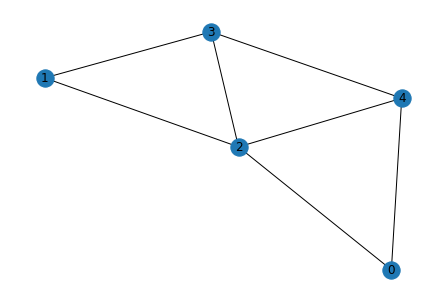

In [6]:
import random
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt

def generate_instance(nb_vertex, min_weight, max_weight):
  """
  Generate a random instance of a graph
  """
  graph = np.zeros((nb_vertex, nb_vertex))
  for i in range(nb_vertex - 1):
    for j in range(i+1, nb_vertex):
      if random.uniform(0, 1) < 0.5:
        weight = random.randint(min_weight, max_weight)
        graph[i, j] = weight
        graph[j, i] = weight
  for i,line in enumerate(graph):
    index_zeros = np.where(line == 0)[0]
    index_zeros = np.delete(index_zeros, np.where(index_zeros == i))
    for j in range(len(index_zeros) - (nb_vertex - 3)):
      index = random.choice(index_zeros)
      index_zeros = np.delete(index_zeros, np.where(index_zeros == index))
      weight = random.randint(min_weight, max_weight)
      graph[i, index] = weight
      graph[index, i] = weight
  return graph

def generate_trafic(graph, nb_vertex, min_weight, max_weight):
  """
  Generate a random instance of a trafic
  """
  trafic = np.zeros((nb_vertex, nb_vertex))
  for i in range(nb_vertex - 1):
    for j in range(i + 1, nb_vertex):
      if (random.uniform(0, 1) < 0.2 and graph[i, j] != 0):
        weight = random.randint(min_weight, max_weight)
        trafic[i, j] = weight
        trafic[j, i] = weight
  return trafic



graph = generate_instance(5,10,60)
trafic = generate_trafic(graph,5,10,20)
print("graph",graph)
print("trafic",trafic)
G = nx.from_numpy_matrix(np.array(graph))  
nx.draw(G, with_labels=True) 

In [20]:
import heapq
def find_shortest_paths(graph, start_point):

    visited = [[False for col in row] for row in graph]
    distance = [[float('inf') for col in row] for row in graph]
    distance[start_point[0]][start_point[1]] = 0
    prev_point = [[None for col in row] for row in graph]
    n, m = len(graph), len(graph[0])
    number_of_points, visited_count = n * m, 0
    directions = [(0, 1), (1, 0), (-1, 0), (0, -1)]
    min_heap = []
    
    heapq.heappush(min_heap, (distance[start_point[0]][start_point[1]], start_point[0], start_point[1]))

    while visited_count < number_of_points:
        current_point = heapq.heappop(min_heap)
        distance_from_start, row, col = current_point
        for direction in directions:
            new_row, new_col = row + direction[0], col + direction[1]
            if -1 < new_row < n and -1 < new_col < m and not visited[new_row][new_col]:
                dist_to_new_point = distance_from_start + graph[new_row][new_col]
                if dist_to_new_point < distance[new_row][new_col]:
                    distance[new_row][new_col] = dist_to_new_point
                    prev_point[new_row][new_col] = (row, col)
                    heapq.heappush(min_heap, (dist_to_new_point, new_row, new_col))
        visited[row][col] = True
        visited_count += 1

    return distance, prev_point

distance, prev_point = find_shortest_paths(graph, (0, 1))


(1, 2)
(2, 1)
[[ 0. 60. 23. 30.]
 [60.  0. 41.  0.]
 [23. 41.  0. 38.]
 [30.  0. 38.  0.]]
[[  0  60  23  30]
 [ 60   0  41 101]
 [ 23  41   0  38]
 [ 30 101  38   0]]


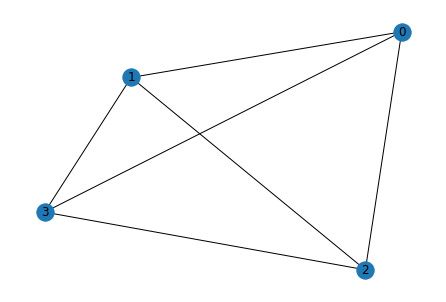

In [25]:
import numpy as np

graph_complet = np.zeros((4,4))
path_list = {}

def get_distance_between_nodes(graph, i, j):
  if (graph[i][j] != 0):
    return graph[i][j], None
  else:
    if i != j:
      distance, path = find_shortest_paths(graph, i, j)
      return distance, path
    else:
      return 0, None

for i in range(len(graph)):
  for j in range(len(graph)):
    distance, path = get_distance_between_nodes(graph, i, j)
    graph_complete[i][j] = distance
    if path != None:
      path_list[(i,j)] = path

# G = nx.from_numpy_matrix(np.array(reshape_matrix))
# nx.draw(G, with_labels=True)